In [1]:
import sys
sys.path.append('/storage/vbutoi/projects')
sys.path.append('/storage/vbutoi/libraries')
sys.path.append('/storage/vbutoi/projects/ESE')
sys.path.append('/storage/vbutoi/projects/UniverSeg')

from ionpy.analysis import ResultsLoader
from ese.experiment.experiment import CalibrationExperiment
import seaborn as sns
sns.set_style("darkgrid")

import os 
os.environ['DATAPATH'] = ':'.join((
       '/storage/vbutoi/datasets',
))
os.environ["CUDA_VISIBLE_DEVICES"] = '1' 

%load_ext yamlmagic
%load_ext autoreload
%autoreload 2

In [2]:
# Results loader object does everything
rs = ResultsLoader()
root = "/storage/vbutoi/scratch/ESE"

In [3]:
path = f"{root}/WMH_aug_runs"

dfc = rs.load_configs(
    path,
    properties=False,
)

df = rs.load_metrics(dfc)

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

In [4]:
dfc

,data,annotator,axis,dataset,slice_batch_size,slicing,task,batch_size,num_workers,pin_memory,...,convs_per_block,filters,in_channels,out_channels,optim,lr,epochs,eval_freq,path,augmentations
0,ese.experiment.datasets.WMH,observer_o12,0,WMH,1,dense,Amsterdam,8,4,False,...,2,"(64, 64, 64, 64)",1,1,torch.optim.Adam,0.0003,500,50,/storage/vbutoi/scratch/ESE/WMH_aug_runs/20230...,NaN
1,ese.experiment.datasets.WMH,observer_o12,0,WMH,1,dense,Amsterdam,1,4,False,...,2,"(64, 64, 64, 64)",1,1,torch.optim.Adam,0.0003,500,50,/storage/vbutoi/scratch/ESE/WMH_aug_runs/20230...,NaN
2,ese.experiment.datasets.WMH,observer_o12,0,WMH,1,dense,Amsterdam,8,4,False,...,2,"(64, 64, 64, 64)",1,1,torch.optim.Adam,0.0003,500,50,/storage/vbutoi/scratch/ESE/WMH_aug_runs/20230...,"[{""RandomAffine"": {""degrees"": [0, 360], ""p"": 0..."
3,ese.experiment.datasets.WMH,observer_o12,0,WMH,1,dense,Amsterdam,1,4,False,...,2,"(64, 64, 64, 64)",1,1,torch.optim.Adam,0.0003,500,50,/storage/vbutoi/scratch/ESE/WMH_aug_runs/20230...,"[{""RandomAffine"": {""degrees"": [0, 360], ""p"": 0..."
4,ese.experiment.datasets.WMH,observer_o12,0,WMH,1,dense,Amsterdam,1,4,False,...,2,"(64, 64, 64, 64)",1,1,torch.optim.Adam,0.0003,500,50,/storage/vbutoi/scratch/ESE/WMH_aug_runs/20230...,NaN
5,ese.experiment.datasets.WMH,observer_o12,0,WMH,16,dense,Amsterdam,1,4,False,...,2,"(64, 64, 64, 64)",1,1,torch.optim.Adam,0.0003,500,50,/storage/vbutoi/scratch/ESE/WMH_aug_runs/20230...,NaN
6,ese.experiment.datasets.WMH,observer_o12,0,WMH,8,dense,Amsterdam,1,4,False,...,2,"(64, 64, 64, 64)",1,1,torch.optim.Adam,0.0003,500,50,/storage/vbutoi/scratch/ESE/WMH_aug_runs/20230...,NaN
7,ese.experiment.datasets.WMH,observer_o12,0,WMH,16,dense,Amsterdam,1,4,False,...,2,"(64, 64, 64, 64)",1,1,torch.optim.Adam,0.0003,500,50,/storage/vbutoi/scratch/ESE/WMH_aug_runs/20230...,"[{""RandomAffine"": {""degrees"": [0, 360], ""p"": 0..."
8,ese.experiment.datasets.WMH,observer_o12,0,WMH,1,dense,Amsterdam,1,4,False,...,2,"(64, 64, 64, 64)",1,1,torch.optim.Adam,0.0003,500,50,/storage/vbutoi/scratch/ESE/WMH_aug_runs/20230...,"[{""RandomAffine"": {""degrees"": [0, 360], ""p"": 0..."
9,ese.experiment.datasets.WMH,observer_o12,0,WMH,8,dense,Amsterdam,1,4,False,...,2,"(64, 64, 64, 64)",1,1,torch.optim.Adam,0.0003,500,50,/storage/vbutoi/scratch/ESE/WMH_aug_runs/20230...,"[{""RandomAffine"": {""degrees"": [0, 360], ""p"": 0..."


In [5]:
best_exp = rs.get_experiment(
    df=df,
    exp_class=CalibrationExperiment,
    metric="val-dice_score",
    checkpoint="max-val-dice_score",
    device="cuda"
)
best_exp.build_dataloader()

{'_class': 'ese.experiment.datasets.WMH', 'annotator': 'observer_o12', 'axis': 0, 'dataset': 'WMH', 'slice_batch_size': 8, 'slicing': 'dense', 'task': 'Amsterdam'}


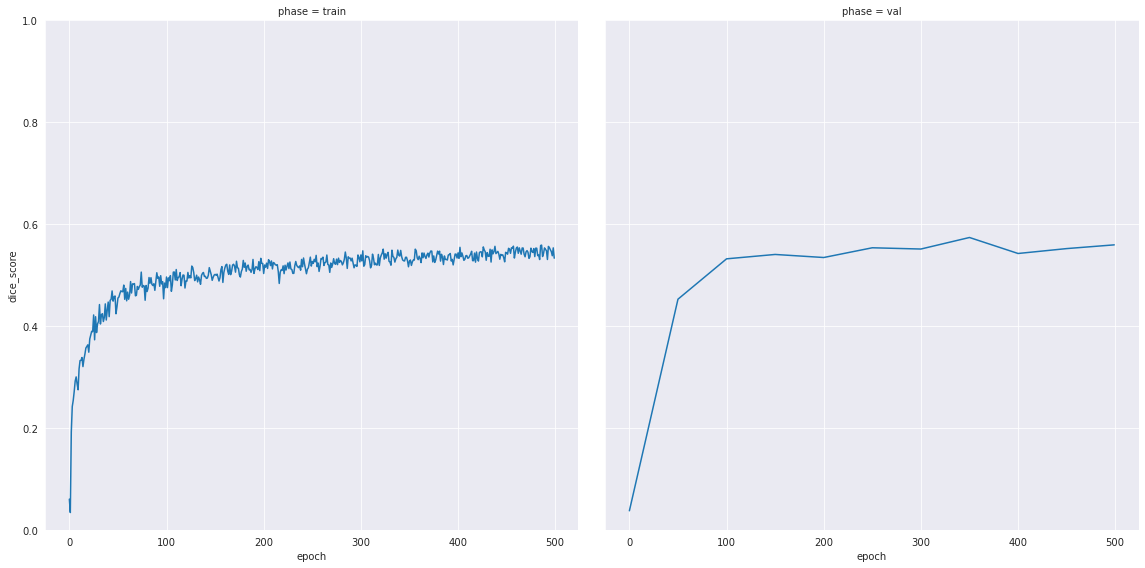

In [6]:
best_exp.vis_loss_curves(height=8)

In [7]:
best_exp.vis_predictions(num_examples=5)

ValueError: not enough values to unpack (expected 2, got 1)